In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the data set

In [227]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Split the data set

In [229]:
X = df['v2']
y = df['v1']

Converting labels to numerical values

In [230]:
y = y.map({'ham': 0, 'spam': 1})

Split the dataset into training and testing

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a Tfidf vectorizer

In [232]:
vectorizer = TfidfVectorizer()

In [233]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [234]:
X_test_vectorized = vectorizer.transform(X_test)

Calculate the frequency of all the messages and the spam messages

In [235]:
frequency = df['v2'].value_counts()
print(frequency)

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [236]:
frequency = df['v2'].value_counts().sum()
print(frequency)

5572


In [237]:
spam_message_frequency = df[df['v1'] == 'spam']['v2'].value_counts()
print(spam_message_frequency)

Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                4
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.       3
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                           3
HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Send HMV to 86688 More info:www.100percent-real.com          3
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+       3
                                                                                                                                                                    .

In [238]:
spam_message_frequency = df[df['v1'] == 'spam']['v2'].value_counts().sum()
print(spam_message_frequency)

747


In [239]:
ham_message_frequency = df[df['v1'] == 'ham']['v2'].value_counts()
print(ham_message_frequency)

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                                4
                                                                                                                                                      

In [240]:
ham_message_frequency = df[df['v1'] == 'ham']['v2'].value_counts().sum()
print(ham_message_frequency)

4825


Train the Naive Bayes Classifier

In [241]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

Predict the labels for the testing data

In [242]:
y_pred = classifier.predict(X_test_vectorized)

Frequency of predicted spam messages

In [243]:
predicted_spam_frequency = pd.Series(y_pred)[pd.Series(y_pred) == 1].value_counts()
print(predicted_spam_frequency)

1    108
dtype: int64


In [244]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[965,   0],
       [ 42, 108]])

Visualizing the actual and predicted values

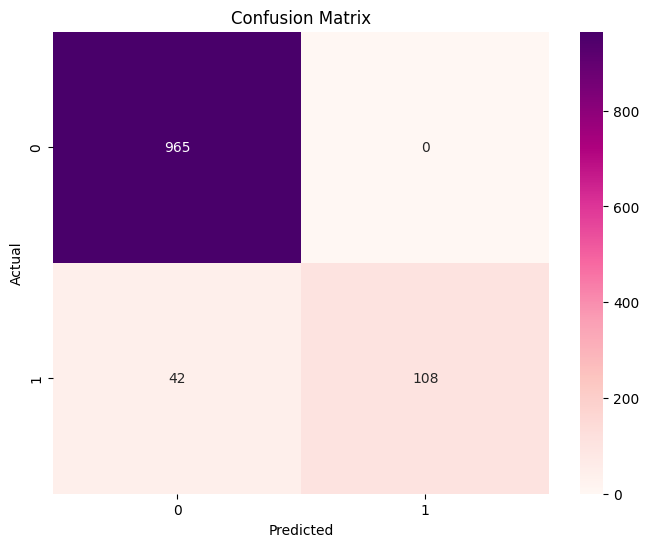

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Calculating the accuracy

In [246]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9623318385650225


In [247]:
user_input = input("Enter a message: ")

Enter a message: okay no problem


In [248]:
input_features = vectorizer.transform([user_input])

In [249]:
prediction = classifier.predict(input_features)

In [250]:
if prediction[0] == 1:
    print("The input is spam.")
else:
    print("The input is not spam.")

The input is not spam.
